In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'elektrik_veri.xlsx'
xls = pd.ExcelFile(file_path)

In [3]:
df_tahsilat = pd.read_excel(xls, sheet_name='Tahsilat')
df_tahsilat_1 = pd.read_excel(xls, sheet_name='Tahsilat 1')
df_tahakkuk = pd.read_excel(xls, sheet_name='Tahakkuk')
df_tahakkuk_1 = pd.read_excel(xls, sheet_name='Tahakkuk 1')
df_tahakkuk_2 = pd.read_excel(xls, sheet_name='Tahakkuk 2')

In [4]:
odeme_sutunlari = ['Nakit Tahsilat', 'Mahsuben Tahsilat', 'Kredi Kartı Tahsilatı', 'Banka Tahsilatı']
df_tahsilat[odeme_sutunlari] = df_tahsilat[odeme_sutunlari].fillna(0)

In [5]:
df_tahsilat['Toplam_Tahsilat'] = df_tahsilat[odeme_sutunlari].sum(axis=1)

In [6]:
zamanlama_sutunlari = [
    'Son Ödeme Tarihinden Önceki Tahsilat',
    'Son Ödeme Tarihindeki Tahsilat',
    'Son Ödeme (1)',
    'Son Ödeme (2)',
    'Son Ödeme (3)',
    'Son Ödeme (4)',
    'Son Ödeme (5)',
    'Son Ödeme (6-10)',
    'Son Ödeme (10-20)',
    'Son Ödeme (20-30)',
    'Son Ödeme (30-60)',
    'Son Ödeme (60-90)',
    'Son Ödeme (90-120)',
    'Son Ödeme (120-150)',
    'Son Ödeme (150-180)',
    'Son Ödeme (180+)'
]

df_tahsilat_1[zamanlama_sutunlari] = df_tahsilat_1[zamanlama_sutunlari].fillna(0)

In [7]:
import pandas as pd
# Tahakkuk sayfalarını birleştirme
df_listesi = [df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2]
df_toplam_tahakkuk = pd.concat(df_listesi, ignore_index=True)

In [8]:
onceki_sayi = len(df_toplam_tahakkuk)
df_tahakkuk_temiz = df_toplam_tahakkuk[df_toplam_tahakkuk['kwh'] >= 0].copy()

In [9]:
negatif_sayisi = onceki_sayi - len(df_tahakkuk_temiz)
print(f"\nTemizlenen Negatif kWh Kayıt Sayısı: {negatif_sayisi}")


Temizlenen Negatif kWh Kayıt Sayısı: 151


In [10]:
print("\nGüncel kWh İstatistikleri:")
print(df_tahakkuk_temiz['kwh'].describe())


Güncel kWh İstatistikleri:
count    1.185547e+06
mean     9.274859e+01
std      9.500024e+02
min      0.000000e+00
25%      1.802000e+01
50%      4.663000e+01
75%      8.000000e+01
max      1.535757e+05
Name: kwh, dtype: float64


In [11]:
ilce_bazli_musteri = df_toplam_tahakkuk.groupby('ilce')['sozlesme_hesap_no'].nunique().sort_values(ascending=False)
print("İlçelere Göre Benzersiz Müşteri Sayıları:")
print(ilce_bazli_musteri)

İlçelere Göre Benzersiz Müşteri Sayıları:
ilce
GÜMÜŞHACIKÖY    18190
GÖYNÜCEK         7128
HAMAMÖZÜ         2981
Name: sozlesme_hesap_no, dtype: int64


In [12]:
toplam_benzersiz = df_toplam_tahakkuk['sozlesme_hesap_no'].nunique()
print(f"\nVeri Setindeki Toplam Benzersiz Müşteri Sayısı: {toplam_benzersiz}")


Veri Setindeki Toplam Benzersiz Müşteri Sayısı: 28290


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tarih dönüşümü
df_tahakkuk_temiz['mali_yil_donem'] = pd.to_datetime(df_tahakkuk_temiz['mali_yil_donem'])
df_tahakkuk_temiz['ay'] = df_tahakkuk_temiz['mali_yil_donem'].dt.month
df_tahakkuk_temiz['yil'] = df_tahakkuk_temiz['mali_yil_donem'].dt.year

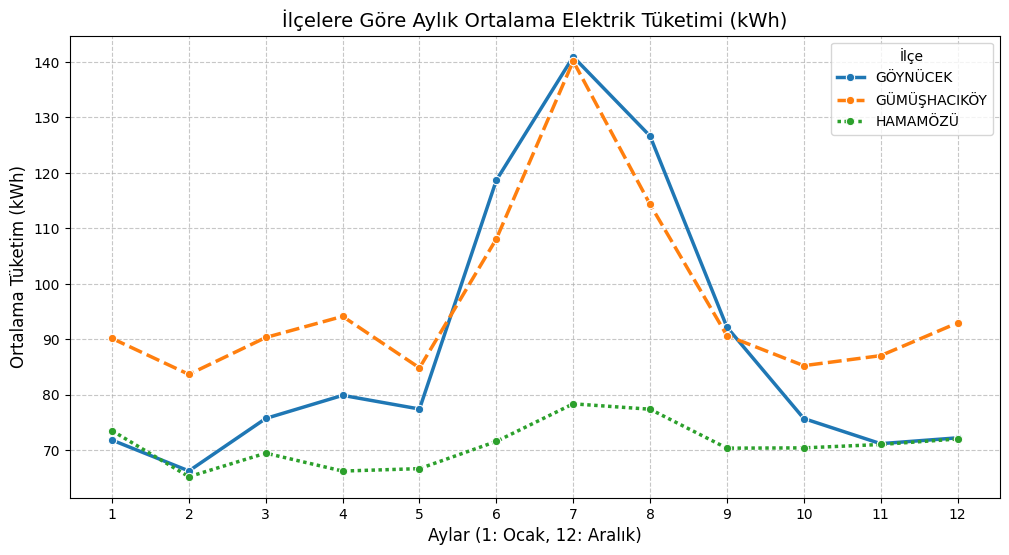

In [63]:
# İlçelere Göre Aylık Ortalama Tüketim- Çizgi Grafiği
trend_data = df_tahakkuk_temiz.groupby(['ay', 'ilce'])['kwh'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, marker='o', linewidth=2.5)

plt.title('İlçelere Göre Aylık Ortalama Elektrik Tüketimi (kWh)', fontsize=14)
plt.xlabel('Aylar (1: Ocak, 12: Aralık)', fontsize=12)
plt.ylabel('Ortalama Tüketim (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='İlçe')
plt.xticks(range(1, 13))
plt.show()

In [21]:
import matplotlib.pyplot as plt

# Zamanında ödeme
zamaninda_sayisi = df_tahsilat_1[(df_tahsilat_1['Son Ödeme Tarihinden Önceki Tahsilat'] > 0) | (df_tahsilat_1['Son Ödeme Tarihindeki Tahsilat'] > 0)].shape[0]

# Geç ödeme
gecikme_sutunlari = [
    'Son Ödeme (1)',
    'Son Ödeme (2)',
    'Son Ödeme (3)',
    'Son Ödeme (4)',
    'Son Ödeme (5)',
    'Son Ödeme (6-10)',
    'Son Ödeme (10-20)',
    'Son Ödeme (20-30)',
    'Son Ödeme (30-60)',
    'Son Ödeme (60-90)',
    'Son Ödeme (90-120)',
    'Son Ödeme (120-150)',
    'Son Ödeme (150-180)',
    'Son Ödeme (180+)'
]
gec_odeme_sayisi = df_tahsilat_1[df_tahsilat_1[gecikme_sutunlari].gt(0).any(axis=1)].shape[0]

toplam_kayit = len(df_tahsilat_1)

zamaninda_oran = (zamaninda_sayisi / toplam_kayit) * 100
gec_oran = (gec_odeme_sayisi / toplam_kayit) * 100

print(f"Zamanında Ödeme Oranı: %{zamaninda_oran:.1f}")
print(f"Geç Ödeme Oranı: %{gec_oran:.1f}")


Zamanında Ödeme Oranı: %86.0
Geç Ödeme Oranı: %27.2


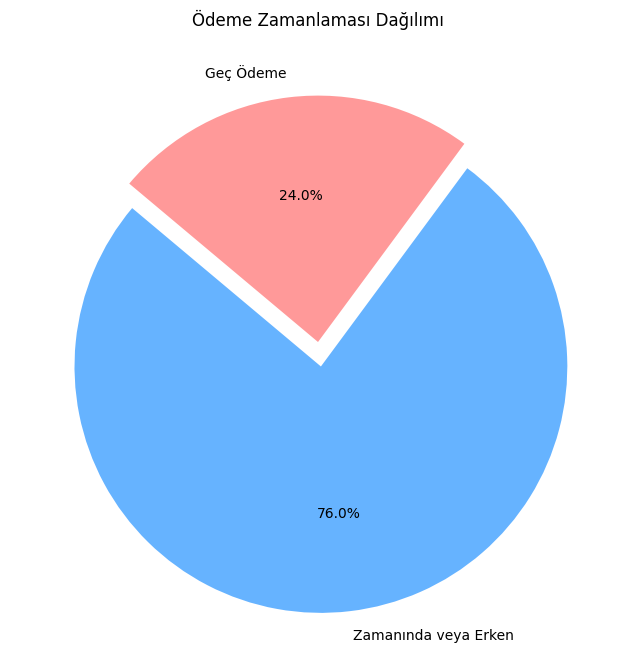

In [65]:
# Ödeme Oranları- Pasta Grafiği
labels = ['Zamanında veya Erken', 'Geç Ödeme']
sizes = [zamaninda_sayisi, gec_odeme_sayisi]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('Ödeme Zamanlaması Dağılımı')
plt.show()

/tmp/ipython-input-138741179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tahsilat, x='İlçe', order=df_tahsilat['İlçe'].value_counts().index, palette='Blues_r')


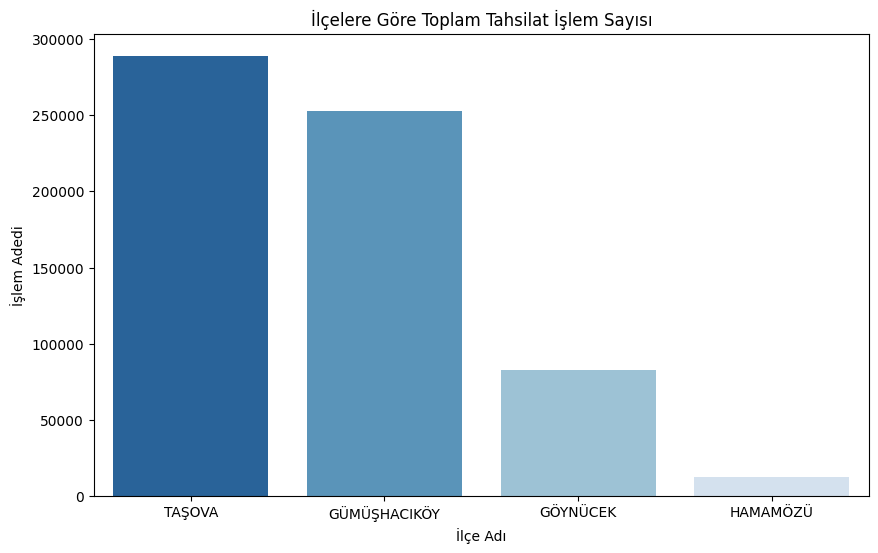

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlçe ve Şube Dağılımları- Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tahsilat, x='İlçe', order=df_tahsilat['İlçe'].value_counts().index, palette='Blues_r')
plt.title('İlçelere Göre Toplam Tahsilat İşlem Sayısı', fontsize=12)
plt.xlabel('İlçe Adı')
plt.ylabel('İşlem Adedi')

plt.show()

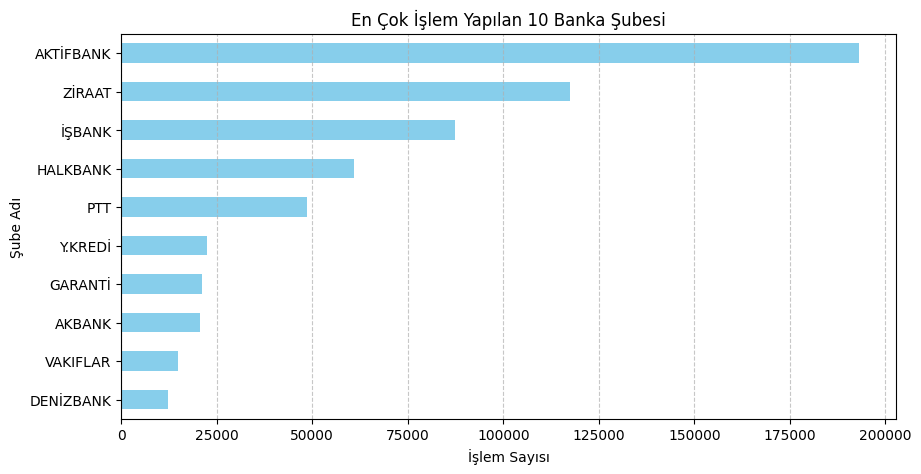

In [35]:
import matplotlib.pyplot as plt

# En yoğun 10 Şube
top_10 = df_tahsilat['Şube'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_10.plot(kind='barh', color='skyblue')
plt.title('En Çok İşlem Yapılan 10 Banka Şubesi', fontsize=12)
plt.xlabel('İşlem Sayısı')
plt.ylabel('Şube Adı')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

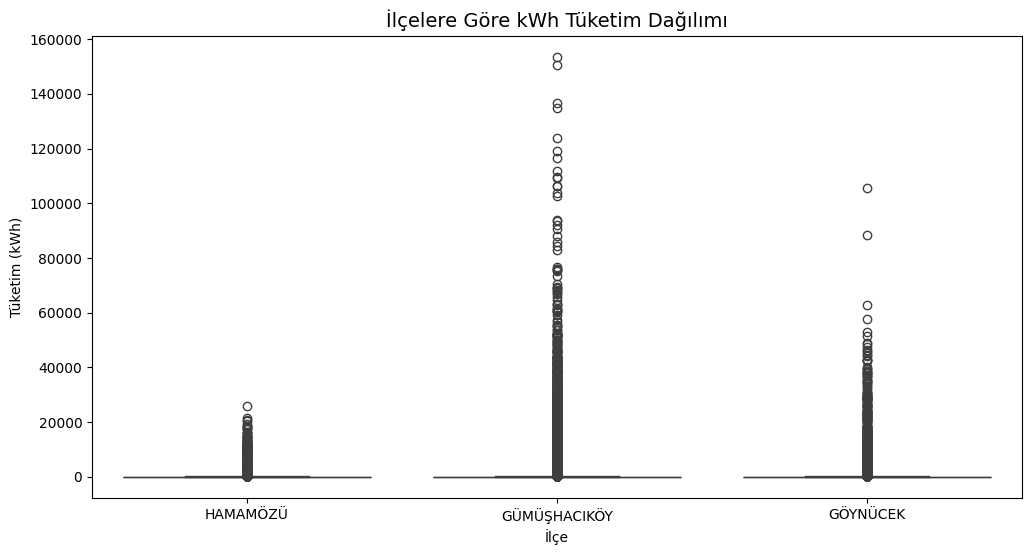

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlçelere Göre Tüketim (kWh) Dağılımı- Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tahakkuk_temiz, x='ilce', y='kwh')
plt.title('İlçelere Göre kWh Tüketim Dağılımı', fontsize=14)
plt.xlabel('İlçe')
plt.ylabel('Tüketim (kWh)')

plt.show()

/tmp/ipython-input-19622361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_sinif.values, y=top_5_sinif.index, ax=axes[i], palette='viridis')
/tmp/ipython-input-19622361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_sinif.values, y=top_5_sinif.index, ax=axes[i], palette='viridis')
/tmp/ipython-input-19622361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_sinif.values, y=top_5_sinif.index, ax=axes[i], palette='viridis')


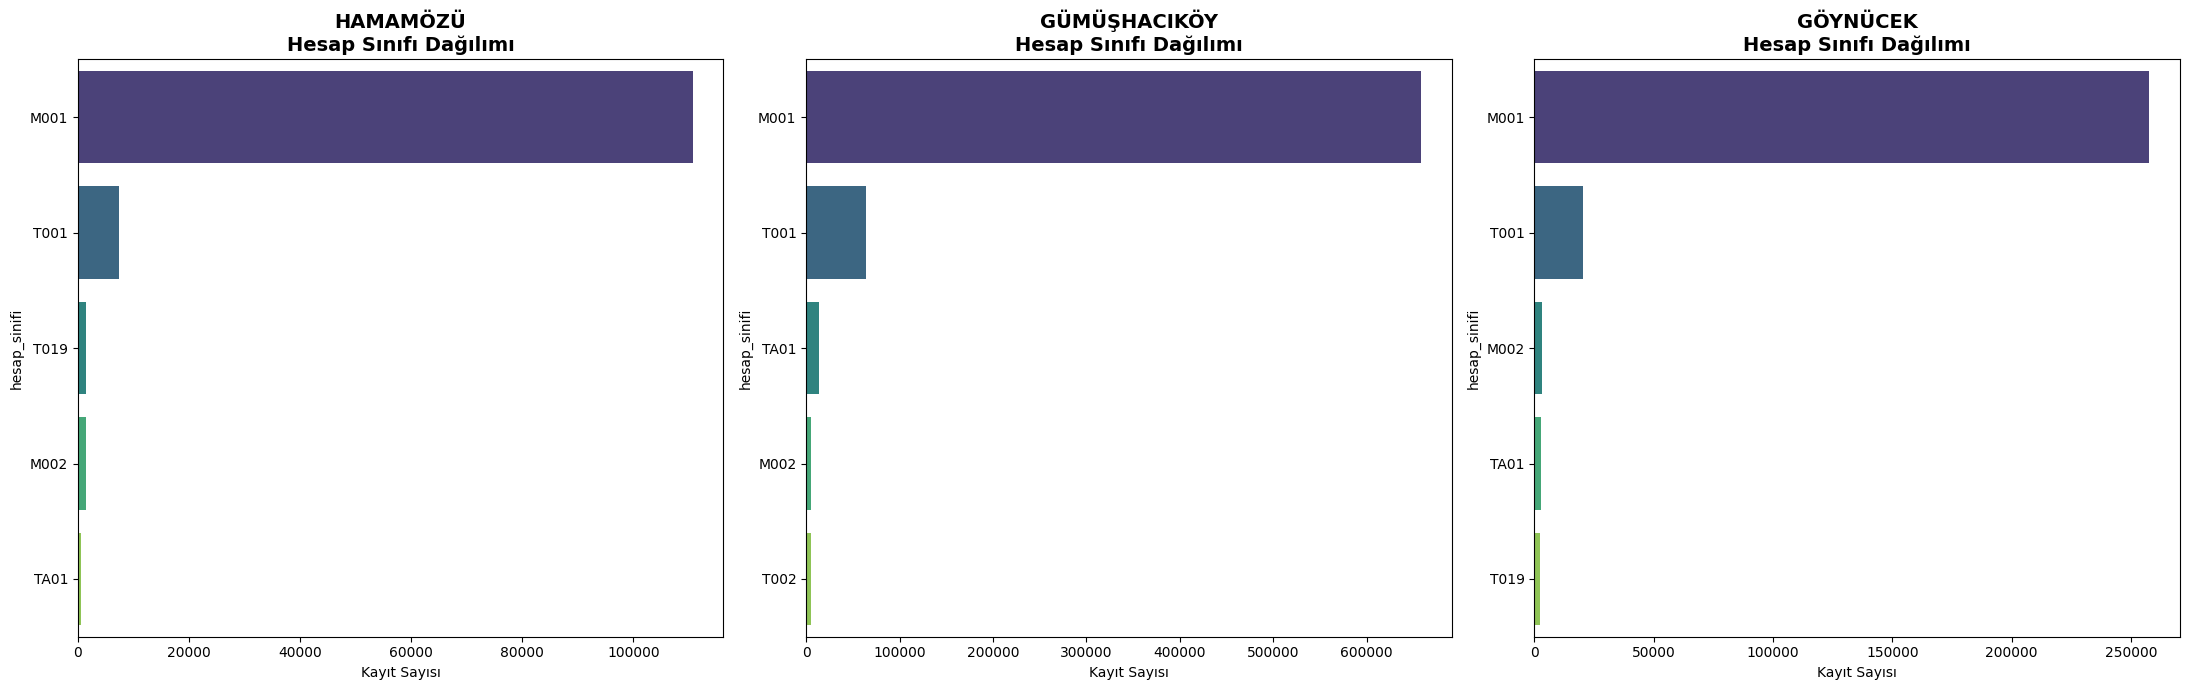

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Her İlçe İçin Hesap Sınıfı Dağılımı- Subplot
ilceler = ['HAMAMÖZÜ', 'GÜMÜŞHACIKÖY', 'GÖYNÜCEK']
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=False)

for i, ilce in enumerate(ilceler):
    ilce_mask = df_tahakkuk_temiz['ilce'] == ilce.upper()
    ilce_data = df_tahakkuk_temiz[ilce_mask]

    top_5_sinif = ilce_data['hesap_sinifi'].value_counts().head(5)
    sns.barplot(x=top_5_sinif.values, y=top_5_sinif.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{ilce}\nHesap Sınıfı Dağılımı', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Kayıt Sayısı')

plt.tight_layout()
plt.show()